<a href="https://colab.research.google.com/github/femi1609/Prodigy/blob/main/PRODIGY_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Loading the Dataset**

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

twitter_df = pd.read_csv("twitter_training.csv")
twitter_df

,Tweet ID,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [48]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
stop_words = set(stopwords.words('english'))

In [50]:
missing_values = twitter_df['text'].isnull().sum()
print("Number of missing values in 'text' column:", missing_values)

twitter_df['text'].fillna('', inplace=True)

Number of missing values in 'text' column: 686


In [51]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(filtered_tokens)

twitter_df['clean_text'] = twitter_df['text'].apply(preprocess_text)
twitter_df

,Tweet ID,entity,sentiment,text,clean_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderlands murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands 2 murder
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realized windows partition mac like 6 years be...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realized mac window partition 6 years behind n...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realized windows partition mac 6 years behind ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,realized windows partition mac like 6 years be...


In [52]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(twitter_df['text'])
y = twitter_df['sentiment']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5967061658967664
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.52      0.38      0.44      2592
    Negative       0.65      0.72      0.68      4519
     Neutral       0.59      0.52      0.55      3596
    Positive       0.58      0.67      0.62      4230

    accuracy                           0.60     14937
   macro avg       0.58      0.57      0.57     14937
weighted avg       0.59      0.60      0.59     14937



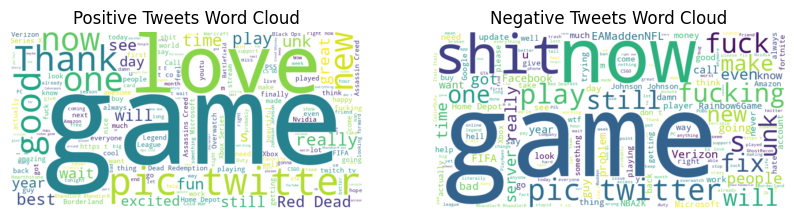

In [57]:
positive_tweets = ' '.join(twitter_df[twitter_df['sentiment'] == 'Positive']['text'])
negative_tweets = ' '.join(twitter_df[twitter_df['sentiment'] == 'Negative']['text'])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Tweets Word Cloud')
plt.axis('off')
plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Tweets Word Cloud')
plt.axis('off')

plt.show()

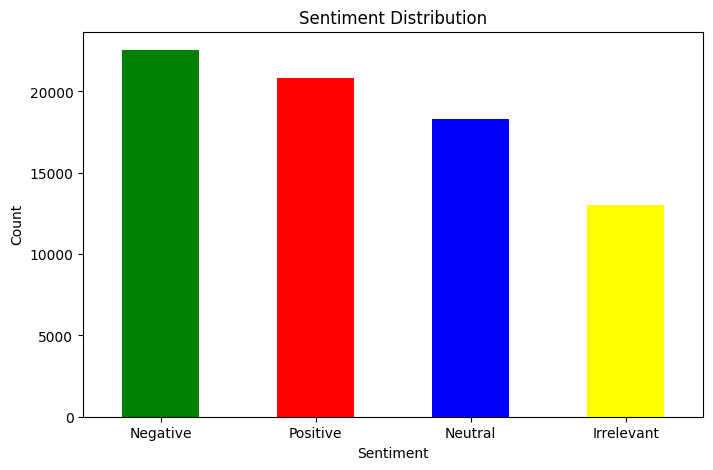

In [59]:
sentiment_distribution = twitter_df['sentiment'].value_counts()
plt.figure(figsize=(8, 5))
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'blue', 'yellow'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()